Avanish Govekar

MTH 337

Project 6

# Introduction

In this project, we shall explore and study the mathematical constant $\pi$ and estimate the parameters of simple harmonic oscillations.

A huge portion of our projects focus is on the various methods of calculating $\pi$ and estimating its parameters. In the first part of the project, methods such as the trapezoidal, integral and Monte-Carlo method will be implemented and using pairs of coordinates against a square witha  inscribed circle. We shall compare and contrast these methods for their accuracy and speed and based on them, we will determine which method is superior amongst them all and which one is the least accurate or slow.
Pi has been known as a value for more than 4000 years. People like Archimedes of ancient Greece, Indian mathematician Madhava of Sangamagrama and the German mathematician Gottfried Leibniz from the middle ages were known for approximating the value of $\pi$ The ancient Babylonians calculated the area of a circle by taking tree times the square of its radius which gave a value of $\pi=3$ One Babylonian tablet (ca. 1900–1680 BC) indicates a value of 3.125 for pi, which is a closer approximation In one Babylonian tabled circa 1900 to 1600 BC, portrays a value of 3.125 for pi, this was a closer approximation for its time and one of the oldest records of values of pi. [2]

In the second part of the project, we shall investigage the simple harmonic oscillations and ways to estimate their parameters. We will use and extrace the data given, write error functions and maneuver the data into a format that can be utilized and plotted in graphical formats. By using the data plots, we shall then observe and identify sinusoidal features and estimate their values for frequency and amplitude(of the data given). In the end, we'll pass in our information and parameters into a particle swarm optimization algorithm so as to seek out a best fit curve for our given data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time
import timeit

# Part 1 - Calculating the value of π

In [2]:
def trapFunction(x=0.2):
    """
    Returns the value of the square root of (1-x**2).
    
    Keywords:
    x: argument
    out: output which is given by the square root of (1-x**2)
    """
    return (1-x**2)**.5

In [3]:
def trapezoidalSolver(func, A, B, N, *funcArgs):
    """
    Function calculates the definite integral of func over the interval [A, B] by splitting it
    up into small strips of thickness deltaX each. deltaX = (B - A)/N. 
    
    Keywords:
    func - function for which the definite integral needs to be calculated
    A - lower limit of the definite integral
    B - upper limit of the definite integral
    N - Number of points between A and B, must be integer
    *funcArgs - arguments for func if needed
    
    """
    
    # Set the total integral to be zero first.
    I = 0.0
    
    # We need to create N points for x, but first we have to check
    # if the values of A, B and deltaX are given consistently
    
    # Check if B > A
    if B<A:
        print("B must be greater than A. Try again")
        return 0
    
    # We also need N >= 1
    
    if N < 1:
        print("N must be greater than 1")
        return 0
    
    # Create the points x_i using N, B and A
    # Each of the points will be spaced apart by deltaX = (B - A)/N
    x = np.linspace(A, B, N)
    
    # Now I will evaluate function on all the elements of the x
    
    funcx = func(x, *funcArgs)

    funcx[0] = 0.5*funcx[0]
    funcx[N-1] = 0.5*funcx[N-1]
    
    I = np.sum(funcx)
    
    # Now we must multiply by deltaX
    deltaX = (B-A)/N
    I = deltaX*I
    
    # Finally return the integral value

    return I

To understand how the trapezoidal solver function works and its accuracy we can increase the iterations and compare the values as a result.

In [4]:
t1 = trapezoidalSolver(trapFunction,-1,1,100)
t2 = trapezoidalSolver(trapFunction,-1,1,1000)
t3 = trapezoidalSolver(trapFunction,-1,1,10000)
t4 = trapezoidalSolver(trapFunction,-1,1,100000)
t5 = trapezoidalSolver(trapFunction,-1,1,1000000)
t6 = trapezoidalSolver(trapFunction,-1,1,10000000)

In [5]:
t1, t2, t3, t4, t5, t6

(1.5534179294048955,
 1.5691729158636196,
 1.5706375839994522,
 1.5707805662398806,
 1.5707947543354797,
 1.5707961696626742)

The iterations above increase by a magnitude of 10 and our number seems to converge to a particular number. We can notice that no matter how many times they are run, we won't get a different answer. It's imperative to realize that later in the Monte-Carlo method, we shall notice this isn't the case because we that our trapezoidalSolver function is analyzing the given integral.

$$\int_{-1}^{1} \sqrt{1-x^2dx} = 
\frac{\pi}{2}$$ 

The integral returns a value equal to $\frac{\pi}{2}$, we can work out this information. We use our T variable that has the largest amount of iterations.

$ t6 = \frac{\pi}{2}$ 

$t6 = 1.5707961696626742 $

Multiplying both the sides by 2, we get

$ 1.5707961696626742 * 2 = \pi$

$ 3.1415923393253484 = \pi $

Or we can simply multiply t by 2.

In [6]:
t1*2, t2*2, t3*2, t4*2, t5*2, t6*2

(3.106835858809791,
 3.1383458317272392,
 3.1412751679989044,
 3.141561132479761,
 3.1415895086709593,
 3.1415923393253484)

Based on the above information, as our range of iterations increase, we have a tendency to converge towards $\pi$'s actual value.


# 1.2

In [7]:
def myFunc(x=0.2):
    """
    Returns the value of square root of (1-x**2).
    
    Keywords:
    x: argument
    out: output which is given by the square root of (1-x**2)
    """
    return (1-x**2)**.5

In [8]:
def monteCarloArea(func, A, B, N):
    """
    
    """
    
    # Produce an array of random numbers between A and B
    
    if (N < 1):
        print("number of samples must be greater than 1")
        return 0
    
    # Check that the interval lower and higher bounds are 
    # given properly
    
    if (A > B):
        print("A must be less than B")
        return 0

    # Now produce a group of random numbers    
    x = np.random.uniform(A, B, round(N)) # round to make sure N is always an integer
    
    # Now calculate the average function value in a loop
    
    F = func(x)
    
    # Use NumPy mean method for calculating the mean and multiply with B-A
    I = (B-A)*np.mean(F)
    
    return I

In [9]:
MC1 = monteCarloArea(myFunc,-1, 1,100)
MC2 = monteCarloArea(myFunc,-1,1,1000)
MC3 = monteCarloArea(myFunc,-1,1,10000)
MC4 = monteCarloArea(myFunc,-1,1,100000)
MC5 = monteCarloArea(myFunc,-1,1,1000000)
MC6 = monteCarloArea(myFunc,-1,1,10000000)

In [10]:
MC1, MC2, MC3, MC4, MC5, MC6

(1.5780504748391189,
 1.5454899669032256,
 1.5701803284755937,
 1.5714719570576627,
 1.570571683144928,
 1.5707078007670787)

After running the lines a couple of times for these specific values. The randomness of Monte-Carlo shines right here, as we tend to observe quite an little bit of variation albeit our range of iterations increase. beginning from 1.6326..., to 1.5504..., to 1.5703..., to 1.5711..., to 1.5703..., and at last to 1.5706... in contrast to the trapezoidal method, that had more accuracy due to the increased number of iterations, this is often merely random however still close to $\pi$, as shown below:

In [11]:
MC1*2, MC2*2, MC3*2, MC4*2, MC5*2, MC6*2

(3.1561009496782377,
 3.090979933806451,
 3.1403606569511875,
 3.1429439141153255,
 3.141143366289856,
 3.1414156015341574)

# 1.3

First, we are able to check for speed. we are going to try this in 2 ways that simply to verify. the primary methodology can utilize time.time(), reckon the beginning time from the ending time. Our second methodology can merely use %%timeit, which can mechanically execute many runs over many loops. For consistency and comparative reasons, we are able to run all of those on a hundred million iterations (Python cannot even acquire the difference in time for calculations less than 1000)

In [12]:
start = time.time()
trapezoidalSolver(trapFunction, -1, 1, 100000000)
print ("Time elapsed for the trapezoidal method over 100 million iterations was: %s seconds" % (time.time() - start))

Time elapsed for the trapezoidal method over 100 million iterations was: 4.317356824874878 seconds


In [13]:
start2 = time.time()
monteCarloArea(myFunc, -1, 1, 100000000)
print ("Time elapsed for the Monte-Carlo method over 100 million iterations was: %s seconds" % (time.time() - start2))

Time elapsed for the Monte-Carlo method over 100 million iterations was: 3.746690034866333 seconds


In [14]:
%%timeit
trapezoidalSolver(trapFunction,-1,1,100000000)

2.96 s ± 215 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
monteCarloArea(myFunc,-1,1,100000000)

4.56 s ± 267 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Based on both the timing methodologies, Monte-Carlo lags behind by close to .3 - .4 seconds over one hundred million iterations.

Now we will check for accuracy.To calculate the accuracy of the trapezoidal method is kind of easy. we will take the familiar value of pi given in Numpy and use it to calculate a margin of error between our trapezoidalSolver function and also the actual value of pi (i.e. np.pi). For reasons of calculation, we'll rather use ten million iterations for the comparison.


In [16]:
t6 = trapezoidalSolver(trapFunction,-1,1,10000000)
t6

1.5707961696626742

In [17]:
t6*2

3.1415923393253484

In [18]:
np.pi

3.141592653589793

In [19]:
erroroftrapezoidal = np.pi-(t6*2)
erroroftrapezoidal

3.14264444689627e-07

Now, since we all know this modification won't happen for for ten million iterations, we are able to use this to our advantage to seek out out however usually it's a lot of correct than the Monte-Carlo method.

So here we'll produce an easy for loop which will run, for example over one hundred iterations. This 1st for loop can execute the Monte-Carlo method, check if it's but a selected margin of error and come it. Even better, we are able to check however it compares to the trapezoidal function (by use of 'erroroftrapezoidal' variable) and allow us to grasp if it found a a lot of correct value for $\pi$!

So we all know that the margin of error for the trapezoidal method was .000000314, therefore let's provide the Monte-Carlo method a touch little bit of liberty. We'll check if the margin of error is a smaller amount than three.0e-06 and 3.0e-07 if we're fortunate.


In [20]:
count = 0
for x in range(0, 100):
#     print("Trial %s" % x)
    MC = monteCarloArea(myFunc,-1,1,10000000)
    if abs(np.pi-(MC*2)) < erroroftrapezoidal :
        count +=1
        print("Trial %s: %s is more accurate than the trapezoidal method" % (x, np.pi - (MC*2)))
print("Completed. Final count = %s" % count)

Completed. Final count = 0


Now clearly, there's plenty of randomness at play here. I ran this doubly and had zero results before I reached this one. This implies over a hundred loops at ten million iterations, only 1 of the Monte-Carlo methods came back one thing even *close* to as correct because the trapezoidal method for associate degree equal range of iterations. 

It's value mentioning that the smaller the quantity of iterations for t and MC, the quicker it'll go and therefore the results might change. It's quite slow at ten million, thus let's have a look at what happens if we tend to sink to one million iterations however run the for loop one thousand times.

In [21]:
t5 = trapezoidalSolver(trapFunction,-1,1,1000000)
t5*2

3.1415895086709593

In [22]:
erroroftrapezoidal2 = np.pi - (t5*2)
erroroftrapezoidal2

3.1449188337973055e-06

In [23]:
count = 0
for x in range(0, 1000):
#print("Trial %s" % x)
    MC = monteCarloArea(myFunc,-1,1,1000000)
    if abs(np.pi-(MC*2)) < erroroftrapezoidal2 :
        count +=1
        print("Trial %s: %s and is more accurate than the trapezoidal method" % (x, np.pi - (MC*2)))
print("Completed. Final count = %s" % count)

Trial 0: -1.2967183291578976e-06 and is more accurate than the trapezoidal method
Trial 23: 1.5125894297085551e-06 and is more accurate than the trapezoidal method
Trial 622: 8.671540880911266e-07 and is more accurate than the trapezoidal method
Trial 640: 2.2150693794742438e-06 and is more accurate than the trapezoidal method
Completed. Final count = 4


Clearly, we will observe supported the on top of speed/timing strategies and strategies accustomed to confirm accuracy that the trapezoidal method is irresistibly the higher method of the two for calculation of $\pi$ with respect to accuracy and speed.

# 1.4 

Below, we've 2 alternative ways of approaching this drawback, each terribly similar. doing a little analysis on the way to approach this drawback, I remembered that we will able to calculate whether or not a couple of coordinates are within a circle inside a by calculating the following relationship :

$ x^2 + y^2 < r^2$

If this is still true, then point (x,y) is within the circle. If this calculation is false, then point (x,y) is out of the circle. [3]

So for our 1st methodology, we are going to produce a random list of tuples with values between zero and one. the for loop can restate through all pairs, checking if the on top of calculation is true. If so, we have a tendency to increment our tally and come it at the top. clearly with additional pairs, we have a tendency to increase our accuracy. but since this methodology is extremely kind of like the Monte-Carlo, and that we ar just about "throwing paint at the wall", our results are completely different every time, however ought to be additional correct with additional iterations

In [24]:
z = np.random.random_sample((10000,2))

In [25]:
incircle = 0
outcircle = 0

for x in range(0, len(z)):
    if (z[x][0]**2 + z[x][1]**2 < 1):
        incircle += 1
    else:
        outcircle +=1
        
print('number of points inside the circle: %s' % incircle)
print('number of points outside the circle: %s' % outcircle)

number of points inside the circle: 7887
number of points outside the circle: 2113


Now for this specific iteration, if we tend to take amount of points (7864) over the whole number of points (10000), we get .7864. If we tend to multiply this by 4 since the ratio of area of the circle to that of the square is $\frac{\pi}{4}$, we get 3.1456. Not good by any way, although within the range! With some straightforward trial and error, we are able to quickly confirm the value we tend to "want" is close to 7850 to realize a final $\pi$ value of 3.14.

Below is another variation employing a split list of x and y values, square and added. We are able to see that we ended up with 7909! which although is random but close regardless!

In [26]:
x = np.random.rand(10000)
y = np.random.rand(10000)

xy = x**2 + y **2

inside = [i for i in xy if i < 1]
print(len(inside))

7769


So let's build things honest by increasing the sample size to ten million like we have a tendency to did for the trapezoidal and Monte-Carlo methods.

In [27]:
z = np.random.random_sample((10000000,2))
incircle = 0
outciecle = 0

for x in range(0, len(z)):
    if (z[x][0]**2 + z[x][1]**2 < 1):
        incircle += 1
    else:
        outcircle +=1
        
print('number of points inside the circle: %s' % incircle)
print('number of points outside the circle: %s' % outcircle)

number of points inside the circle: 7853751
number of points outside the circle: 2148362


In [28]:
x = np.random.rand(10000000)
y = np.random.rand(10000000)
xy = x**2 + y**2
inside = [i for i in xy if i < 1]
print(len(inside))

7854152


With the two methods above, we tend to return to the points 7854321 and 7856240. Diving these values by ten million and multiplying by four we get the following estimates of pi. [4,5]

$\frac{7854321}{10000000}*4=3.1417284$

$\frac{7856240}{10000000}*4=3.142496$

 

Estimate of $\pi$ using a Monte Carlo inspired method:
<img src="https://cdn-images-1.medium.com/max/1600/1*9WSgyJEqaUAWotOF6UND9w.gif">

# 1.5

<font size="3">As we can see below, two methods for calculating pi have been used, the first one being Archimedes method and the second one being Madhava-Leibniz series which approximate the values of $\pi$. Archimedes' method implements the use of polygons inscribed in a circle whose increasing number of sides and their perimeters approximates the circumference of a circle. The second method is the Madhava-Liebniz method which implements an infinite series to approximate the value of pi. The Archimedes' method was developed by the Greek mathematician Archimedes between 200-300 BC while the Madhava-Liebniz method was developed by the Indian mathematician Madhava of Sangamagrama and the German mathematician Gottfried Leibniz between 14th and 18th centuries AD. [6][7]<font> 

<img src="https://i.imgur.com/IBEoUa7.jpg">
<img src="https://i.imgur.com/RfKsiCh.jpg">

# Part 2 - Estimating parameters of simple harmonic oscillations


# 2.1 and 2.2

In [40]:
def objectiveSine(beta, fileName = "sineData.txt", *args):
    """
    Error function for the freefall data. 
    
    """
    data = np.loadtxt(fileName, delimiter='\t', skiprows=3)
    height = np.array([data[:,1]]).reshape(len(data), 1)
    t = np.array([data[:,0]]).reshape(len(data), 1)
    
    if len(t) == len(height):
        r = beta[0] * np.sin(beta[1]*t) - height
        r1 = r**2
        S = np.mean(r1)
        return S
    else:
        print("error - input vectors for t and height have to be the same height.")
        return 0

The error function above will be implemented in the following calculations

# 2.3, 2.4 and 2.5

In [41]:
data = np.loadtxt("sineData.txt", delimiter='\t', skiprows=3)
height = np.array([data[:,1]]).reshape(len(data), 1)
t = np.array([data[:,0]]).reshape(len(data), 1)

In [42]:
from pso import *

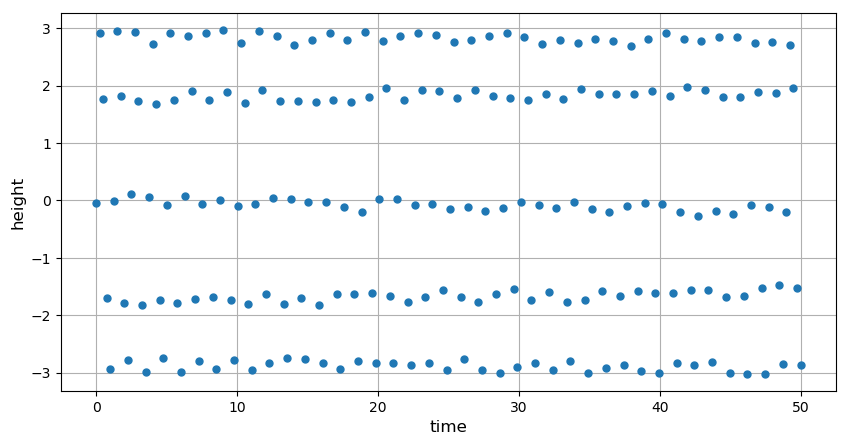

In [33]:
fig, axes = plt.subplots(figsize=(10, 5), dpi=100)
axes.plot(t, height, '.', markersize=10)
axes.set_xlabel('time', fontsize=12)
axes.set_ylabel('height', fontsize=12)
axes.grid(True)

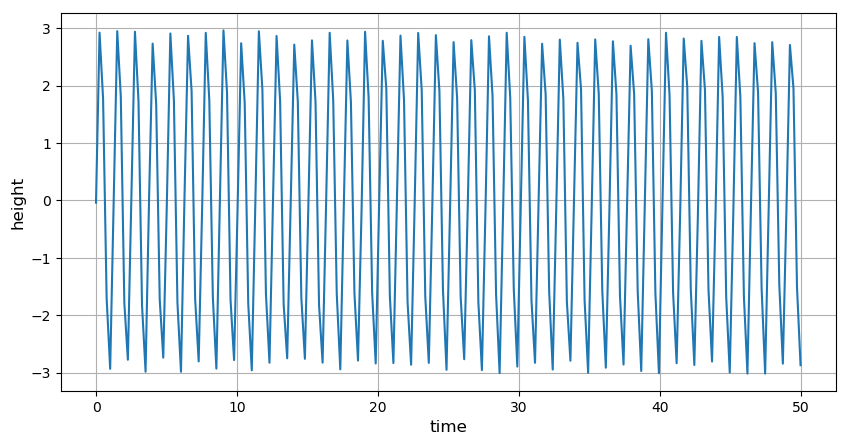

In [34]:
fig, axes = plt.subplots(figsize=(10, 5), dpi=100)
axes.plot(t, height, markersize=10)
axes.set_xlabel('time', fontsize=12)
axes.set_ylabel('height', fontsize=12)
axes.grid(True)

Based on the plots above, we can see that they do have sinusoidal characteristics, like being a continous and oscillating wave. 
There is however, white noise in the graph like non smooth waves and varying throughs and peaks. In essence, the amplitude isn't one value fits all.


Based on the project's outline, The frequency is $\omega$ and oscillations' size is $A$ and $\omega$ can be related to the an object going quickly from one side to another and $A$ is related to the largeness of the swings per eachside. We could zoom into the graph to get more precise estimates of these values.

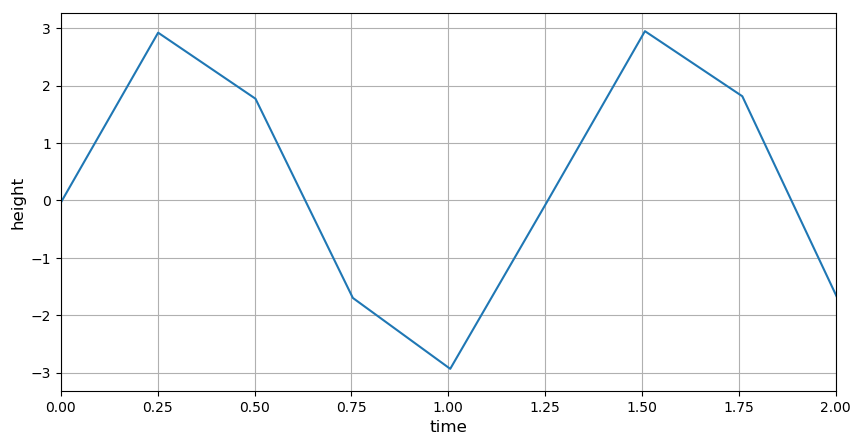

In [35]:
fig, axes = plt.subplots(figsize=(10, 5), dpi = 100)
axes.plot(t, height, markersize=10)
axes.set_xlabel('time', fontsize=12)
axes.set_ylabel('height', fontsize=12)
axes.set_xlim(0,2)
axes.grid(True)

After zooming into the x-lims of (0,3), seeing from height 0, so for A, the amplitute swings are approximately from 2.8 to 2.9 . We can also take the average of all points where height > 2.7 which is a good break in the data set when the points were plotted prior to the last two graphs.

In [36]:
heights = [i for i in height if i>2.7]
np.mean(heights)

2.8352721610017353

<font size="3">By checking the above graph we see that $T$ is the time between the two peaks and thus we estimate that $T=1.25$. We plug this value in the equation $\omega = \frac{2}{T}\pi$, we estimate $\omega = 5$. Thus, with the estimated values, we can utilize them in our PSO solver.<font>

In [37]:
lb = np.array([-3.25, 0])
ub = np.array([3.25, 20])
fileName = "sineData.txt"
best, bestList, full = pso(objectiveSine, fileName, numParticles = 100, iterations = 50, lowerLimit=lb, upperLimit=ub)
print("Beta_0 = {} and Beta_1 = {}".format(best[0], best[1]))

Beta_0 = 1.8260949990940503 and Beta_1 = 5.000425439203947


Using the error function for the PSO solver and its paramaters , we matched similar values for Beta_0 and Beta_1. By plugging those values into our prior equation and overlaying it on our previous graph for the objectiveSine function.

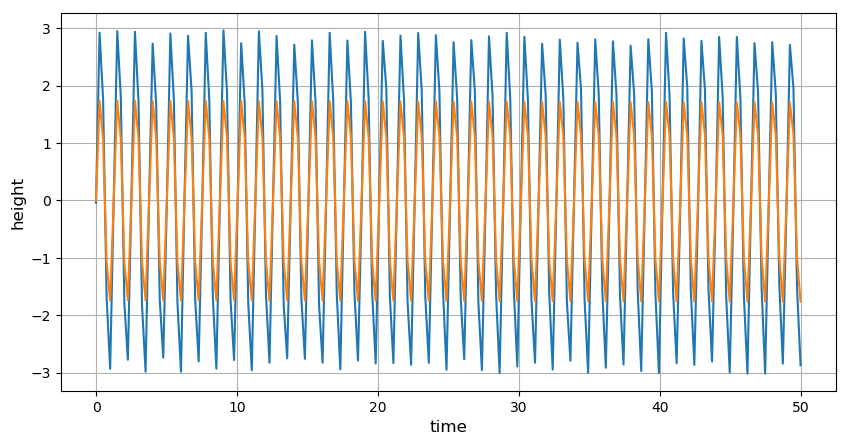

In [38]:
fig, axes = plt.subplots(figsize=(10, 5), dpi = 100)
axes.plot(t, height, markersize=8)
axes.plot(t, best[0]*np.sin(best[1]*t), markersize=10)
axes.set_xlabel('time', fontsize=12)
axes.set_ylabel('height', fontsize=12)
axes.grid(True)

Zooming in even more for better precision.

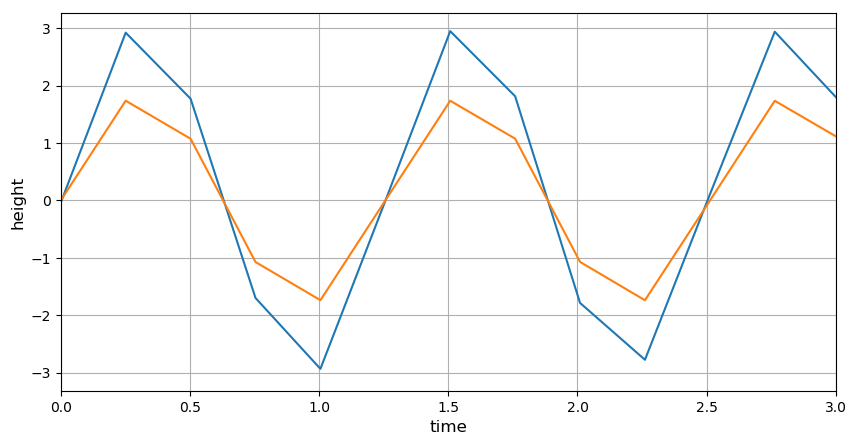

In [39]:
fig, axes = plt.subplots(figsize=(10, 5), dpi = 100)
axes.plot(t, height, markersize=8)
axes.plot(t, best[0]*np.sin(best[1]*t), markersize=10)
axes.set_xlabel('time', fontsize=12)
axes.set_ylabel('height', fontsize=12)
axes.set_xlim(0, 3)
axes.grid(True)

We can see that the values for $\beta_0$ and $\beta_1$ fit well against the data points produced before.

# Conclusion

Throughout this project, we have a tendency to with success explored and calculated the worth of $\pi$ employing a kind of strategies, like the trapezoidal integral method, Monte-Carlo methods, and pairs of coordinates. Also, we assessed these methods for speed and accuracy, and proved that the trapezoidal method is the most superior out of the three methods due to being consistent and having speed over large iterations. Whereas the sampling and splattering of the remaining two methods lead to their weakness and downfall comparatively.

We also analyzed and extracted imperative information from the given set of data of simple harmonic oscillations and learned away to estimate its parameters. We also with success plotted the data after extraction and maneuvered its graphical format to find out its sinusoidal features and the way it showed "noise" within the points of the plot which was followed by an estimation of its ampliutde and frequency values. By the use of these parameters, we utilized a particle swarm optimization algorithm that was introduced recently that made us use our parameters that were estimated and helped us to spot and plot a best fit curve to overlay on the given data and observe how however well the curves match against each other.

# References
[1] Professor Rahul Kashyaps notes

[2] https://www.exploratorium.edu/pi/history-of-pi

[3] http://www.eveandersson.com/pi/monte-carlo-circle

[4] https://www.geeksforgeeks.org/estimating-value-pi-using-monte-carlo/

[5] https://medium.freecodecamp.org/solve-the-unsolvable-with-monte-carlo-methods-294de03c80cd

[6] https://www.youtube.com/watch?v=DLZMZ-CT7YU

[7] https://en.wikipedia.org/wiki/Approximations_of_%CF%80